## Training with DenseNet-121

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets, models, transforms
from torch import optim
import torch.nn.functional as F

import helper

In [19]:
# Loading images
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


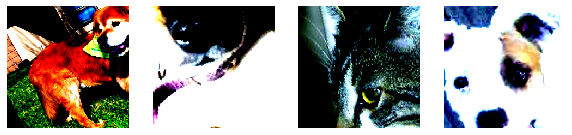

In [20]:
# View images
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for i in range(4):
    ax = axes[i]
    helper.imshow(images[i], ax=ax, normalize=False)

In [25]:
# Run on GPU if possible
device = torch.device("cude" if torch.cuda.is_available() else "cpu")

# Define my model
model = models.densenet121(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

my_classifier = nn.Sequential(nn.Linear(1024, 512),
                              nn.ReLU(),
                              nn.Dropout(p=0.2),
                              nn.Linear(512, 128),
                              nn.ReLU(),
                              nn.Dropout(p=0.2),
                              nn.Linear(128, 2))
  

model.classifier = my_classifier  # I think it's model.(type: classifier for densenet and fc for resnet = name of model)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.005)

model.to(device)

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
# Training Process

epochs = 1
steps = 0
running_loss = 0

train_losses, test_losses = [], [] # for graphing purposes

for e in range(epochs):
    for images, labels in trainloader:
        steps += 1
        
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        log_prob = model.forward(images)
        loss = criterion(log_prob, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            model.eval()
            
            for images, labels in testloader:
                images, labels = images.to(device), labels.to(device)
                lob_prob_test = model.forward(images)
                loss = criterion(log_prob_test, labels)
                test_loss += loss.item()
                
                prob = torch.exp(log_prob_test)
                top_prob, top_class = ps.topk(1, dim=1)
                equality = top_class == labels.view(top_class.shape)
                accuracy += torch.mean(equality.type(torch.FloatTensor)).item()     
                
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(e+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))